Data Science Homework #2
===

2232036001 권준형
---

1. 4.7 Exercises Problem 1

4.7 Exercises Problem 1
---

In [1]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

이미지 파일 로딩, 우선 빨간색 이미지를 로딩

In [2]:
import imageio

img_arr = imageio.imread('C:/Users/jhkwo/DataScience/hw4/red_tomato.jpg')
img_arr.shape

(400, 720, 3)

레이아웃 변경. 너비, 높이, RGB채널의 3차원 배열 형식인 이미지의 레이아웃을
텐서로 표현하기에 절절한 차원으로 레이아웃을 변경.
파이토치 모듈의 이미지 텐서는 채널x높이x너비 순으로 배치되어야 한다.

토마토 이미지 텐서의 평균을 계산하여 이미지의 밝기를 구하고,
과 각 RGB 채널의 평균값을 구한다.

In [3]:
img = torch.from_numpy(img_arr)
out = img.permute(2,0,1)

In [52]:
print(img_arr.mean())
print(out.size())

132.9809824625651
torch.Size([3, 400, 720])


In [63]:
c1 = out[0,:]
c2 = out[1,:]
c3 = out[2,:]
c1 = c1.float()
c2 = c2.float()
c3 = c3.float()
print(c1.mean())
print(c2.mean())
print(c3.mean())

tensor(219.3831)
tensor(94.0664)
tensor(85.6163)


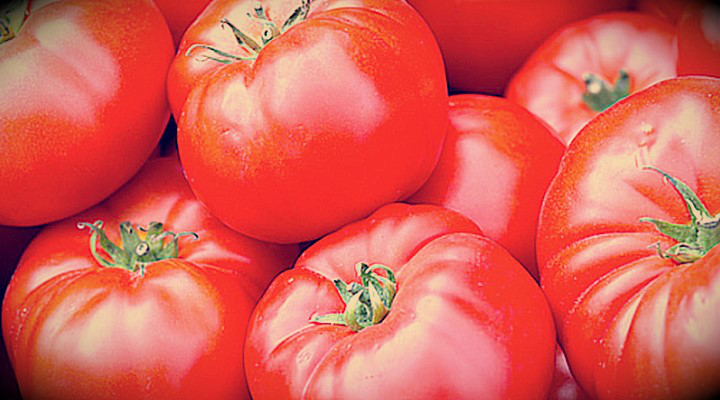

In [66]:
from PIL import Image
tomato = Image.open('C:/Users/jhkwo/DataScience/hw4/red_tomato.jpg')
tomato

빨간색 이미지(토마토)의 이미지는 RGB 채널 중 R 채널의 값이 가장 높게 나온다.

In [13]:
batch_size = 6
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

위 방식은 하나의 이미지를 다룬다.
텐서플로는 여러 이미지를 입력으로 넣는 기능도 제공한다.

첫 번째 차원에 여러 이미지를 배치로 넣어
N x C x H x W  텐서로 만들 수 있다.

이미지는 인터넷에서 구한 뒤, 256x256 사이즈로 변환한 뒤 사용하였다.

빨간색/파란색/초록색 이미지를 2장씩 사용하였기 때문에 배치 사이즈를 6으로 설정하고 이미지를 가져온다.

In [72]:
import os

data_dir = 'C:/Users/jhkwo/DataScience/hw4/images'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.jpg']
filenames


['blue_shoe.jpg',
 'blue_snow.jpg',
 'green-leaf.jpg',
 'green_nut.jpg',
 'red_apple.jpg',
 'red_tomato.jpg']

6장의 이미지(파란 신발, 파란 배경(눈), 초록 이파리, 초록 완두콩, 빨간 사과 빨간 토마토)를 받아와서 img_t 라는 텐서로 만들었다.

for 문이 돌아가는 동안 각 이미지의 평균을 출력하도록 mean함수를 작성하여 각 이미지의 밝기를 출력한다.

In [71]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    print(i)
    batch[i] = img_t
    print(img_t.size())
    print(img_arr.mean())

0
torch.Size([3, 256, 256])
94.06911214192708
1
torch.Size([3, 256, 256])
58.037567138671875
2
torch.Size([3, 256, 256])
95.66196187337239
3
torch.Size([3, 256, 256])
73.84827677408855
4
torch.Size([3, 256, 256])
83.9491678873698
5
torch.Size([3, 256, 256])
132.9809824625651


밝은 이미지일수록 평균값이 높게 나오는 것을 확인하였다.

토마토 이미지의 경우 256 사이즈로 변환하면서 평균값이 달라진 것을 확인하였다.

다음으로, 각 이미지에 대해 채널 별 평균값을 구한다.

In [69]:
for i in range(6):
    print(i)
    temp = batch[i]
    temp = temp.float()
    for j in range(3):
        chan = temp[j,:]
        print(chan.mean())
        
    

0
tensor(56.8694)
tensor(95.1767)
tensor(130.1612)
1
tensor(11.2961)
tensor(41.2083)
tensor(121.6084)
2
tensor(118.7758)
tensor(143.5269)
tensor(24.6832)
3
tensor(77.4999)
tensor(131.4773)
tensor(12.5676)
4
tensor(166.2152)
tensor(42.3125)
tensor(43.3197)
5
tensor(219.2494)
tensor(94.0819)
tensor(85.6117)


파란색 이미지는 2번(3번째) 채널인 B 채널의 평균값이 가장 높게 나온다.
초록색 이미지는 G 채널, 빨간색 이미지는 R 채널의 평균값이 가장 크게 나오는 것을 확인하였다.

임의로 구한 사물의 이미지이다보니, 배경색, 채도 등의 이유로 평균값이 명확하지 않은 (leaf 사진) 경우도 있으나, RGB 채널의 평균값으로 부터 해당 이미지가 어떤 색상의 이미지인지 판별하는 것은 가능하다.